# MARKET SEGMENTATION FOR AIRLINES

Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set. 

In this problem, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers. 

The file AirlinesCluster.csv contains information on 3,999 members of the frequent flyer program. This data comes from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce. For more information, see the website for the book.

There are seven different variables in the dataset, described below:

* **Balance** = number of miles eligible for award travel
* **QualMiles** = number of miles qualifying for TopFlight status
* **BonusMiles** = number of miles earned from non-flight bonus transactions in the past 12 months
* **BonusTrans** = number of non-flight bonus transactions in the past 12 months
* **FlightMiles** = number of flight miles in the past 12 months
* **FlightTrans** = number of flight transactions in the past 12 months
* **DaysSinceEnroll** = number of days since enrolled in the frequent flyer program

In [1]:
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
airlines = read.csv('data//AirlinesCluster.csv')

In [3]:
str(airlines)

'data.frame':	3999 obs. of  7 variables:
 $ Balance        : int  28143 19244 41354 14776 97752 16420 84914 20856 443003 104860 ...
 $ QualMiles      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BonusMiles     : int  174 215 4123 500 43300 0 27482 5250 1753 28426 ...
 $ BonusTrans     : int  1 2 4 1 26 0 25 4 43 28 ...
 $ FlightMiles    : int  0 0 0 0 2077 0 0 250 3850 1150 ...
 $ FlightTrans    : int  0 0 0 0 4 0 0 1 12 3 ...
 $ DaysSinceEnroll: int  7000 6968 7034 6952 6935 6942 6994 6938 6948 6931 ...


In [4]:
summary(airlines)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

## Normalizing the Data

Let's go ahead and normalize our data. You can normalize the variables in a data frame by using the preProcess function in the "caret" package. You should already have this package installed from Week 4, but if not, go ahead and install it with install.packages("caret"). Then load the package with library(caret).

In [5]:
library(caret)

Warning message:
: package ‘caret’ was built under R version 3.2.4Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

**Now, create a normalized data frame called "airlinesNorm" by running the following commands:**

In [6]:
preproc = preProcess(airlines)

airlinesNorm = predict(preproc, airlines)

The first command pre-processes the data, and the second command performs the normalization. If you look at the summary of airlinesNorm, you should see that all of the variables now have mean zero. You can also see that each of the variables has standard deviation 1 by using the **sd()** function.

In [14]:
apply(airlinesNorm, 2, mean)

Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
   2.765404e-17    2.671930e-17   -4.273644e-17   -7.191137e-17    1.481803e-17 
    FlightTrans DaysSinceEnroll 
   1.074147e-17    5.563695e-17

In [13]:
apply(airlinesNorm, 2, sd)

Balance       QualMiles      BonusMiles      BonusTrans     FlightMiles 
              1               1               1               1               1 
    FlightTrans DaysSinceEnroll 
              1               1

In [20]:
sort(apply(airlinesNorm, 2, max))

DaysSinceEnroll      BonusTrans      BonusMiles     FlightTrans       QualMiles 
       2.022842        7.746727       10.208293       13.610351       14.223084 
        Balance     FlightMiles 
      16.186811       21.680292

In [19]:
sort(apply(airlinesNorm, 2, min))

DaysSinceEnroll      BonusTrans         Balance      BonusMiles     FlightTrans 
     -1.9933614      -1.2080518      -0.7303482      -0.7099031      -0.3621226 
    FlightMiles       QualMiles 
     -0.3285622      -0.1862754

## Hierarchical Clustering:

Compute the distances between data points (using euclidean distance) and then run the Hierarchical clustering algorithm (using method="ward.D") on the normalized data. It may take a few minutes for the commands to finish since the dataset has a large number of observations for hierarchical clustering.

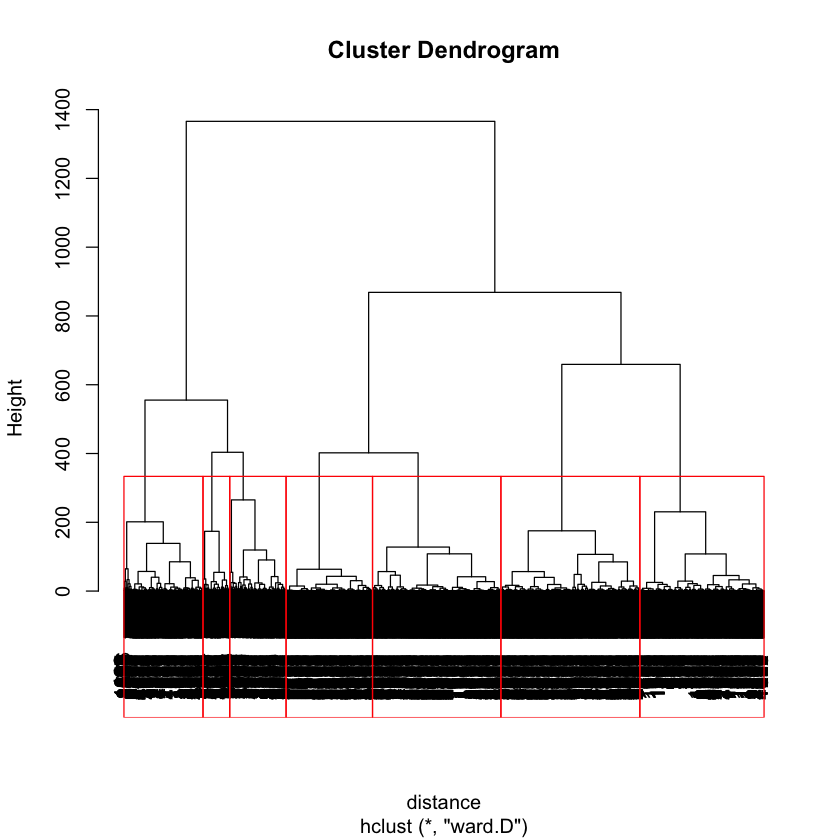

In [22]:
distance = dist(airlinesNorm, method = "euclidean")
clusterIntensity = hclust(distance, method = "ward.D")
plot(clusterIntensity)
# visulize the cuts:
rect.hclust(clusterIntensity, k = 7, border="red")

In [23]:
airlineClusters = cutree(clusterIntensity, k = 5)

In [24]:
table(airlineClusters)

airlineClusters
   1    2    3    4    5 
 776  519  494  868 1342 

In [34]:
sort(tapply(airlines$Balance, airlineClusters, mean), decreasing = TRUE)

3         2         1         4         5 
198191.57 110669.27  57866.90  52335.91  36255.91

In [36]:
sort(tapply(airlines$QualMiles, airlineClusters, mean), decreasing = TRUE)

2            3            4            5            1 
1065.9826590   30.3461538    4.8479263    2.5111773    0.6443299

In [37]:
sort(tapply(airlines$BonusMiles, airlineClusters, mean), decreasing = TRUE)

3         2         4         1         5 
55795.860 22881.763 20788.766 10360.124  2264.788

In [41]:
sort(tapply(airlines$FlightMiles, airlineClusters, mean), decreasing = TRUE)

2          3          5          4          1 
2613.41811  327.67611  119.32191  111.57373   83.18428

In [33]:
sort(tapply(airlines$DaysSinceEnroll, airlineClusters, mean), decreasing = TRUE)

1        3        2        5        4 
6235.365 5615.709 4402.414 3060.081 2840.823

## K-means:

In [42]:
k=5
set.seed(88)
KMC = kmeans(airlinesNorm, centers=k, iter.max = 1000)
str(KMC)

List of 9
 $ cluster     : int [1:3999] 4 4 4 4 1 4 3 4 2 3 ...
 $ centers     : num [1:5, 1:7] 1.4444 1.0005 -0.0558 -0.1333 -0.4058 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:7] "Balance" "QualMiles" "BonusMiles" "BonusTrans" ...
 $ totss       : num 27986
 $ withinss    : num [1:5] 4948 3624 2054 2040 2321
 $ tot.withinss: num 14987
 $ betweenss   : num 12999
 $ size        : int [1:5] 408 141 993 1182 1275
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [43]:
table(KMC$cluster)


   1    2    3    4    5 
 408  141  993 1182 1275 

In [45]:
KMC$centers

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
1,1.4443971,0.5111573,1.8769284,1.0331951,0.1169945,0.1444636,0.7198040
2,1.0005410,0.6838223,0.6144780,1.7214887,3.8559798,4.1196141,0.2742394
3,-0.05580605,-0.14104391,0.30413576,0.71087436,-0.12182784,-0.12875687,-0.33982091
4,-0.1333174,-0.1149161,-0.3492669,-0.3373455,-0.1833989,-0.1961819,0.9640923
5,-0.40579897,-0.02281076,-0.58164823,-0.76190536,-0.19896025,-0.21965815,-0.88977471


In [47]:
sort(tapply(airlines$Balance, KMC$cluster, mean), decreasing = TRUE)

1         2         3         4         5 
219161.40 174431.51  67977.44  60166.18  32706.67